## IMPORTS

In [27]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## CREATING SYNTHETIC DATA

Two datasets are created for this A/B test and analysis. <br>
Each dataset consists of 10000 randomly generated values of either 0 or 1. <br>
This binary data can for example simulate the number of times an ad was clicked on a webpage.

In [13]:
dataset_A = np.random.choice([0, 1], size=(10000,))
dataset_B = np.random.choice([0, 1], size=(10000,))

## VISUALIZING DATASETS

To better understand the datasets, it is useful to visualize them. <br>
Datasets are visualized here with histograms.

In [14]:
df_A = pd.DataFrame(dataset_A)
df_B = pd.DataFrame(dataset_B)

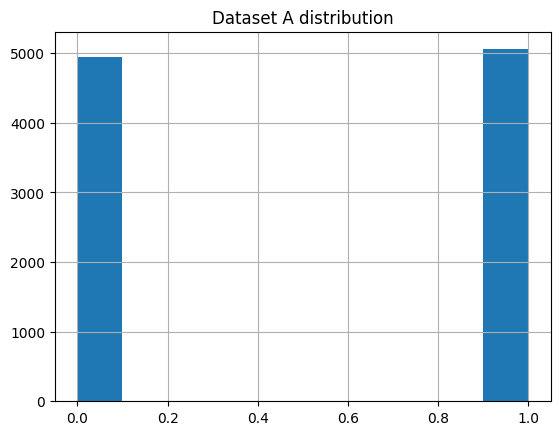

In [20]:
df_A.hist()
plt.title('Dataset A distribution') 
plt.show() 

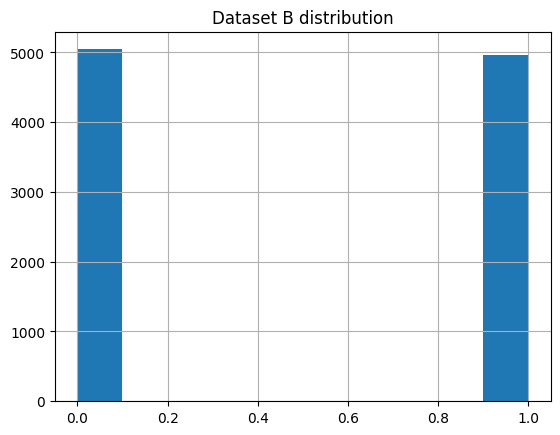

In [21]:
df_B.hist()
plt.title('Dataset B distribution') 
plt.show() 

## TESTING FOR DIFFERENCE IN DISTRIBUTION (A/B TEST)

In the histograms we can see that dataset A has more 1-values. <br> 
Statistical significance of this finding can be evaluated by creating a contingency table of the values and performing a Chi-Squared test. <br>
The Null hypothesis is that both of these datasets come from the same distribution and the difference they show is insignificant.

In [32]:
# Creating the subgroups
df_A_1 = df_A.value_counts()[1]
df_A_0 = df_A.value_counts()[0]
df_B_1 = df_B.value_counts()[1]
df_B_0 = df_B.value_counts()[0]

# Creating the contingency table
contingency_table = pd.crosstab(df_A[0], df_B[0])

# Performing the Chi-Squared test
chi_2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-Squared statistic: {chi_2}")
print(f"p-value: {p}")

Chi-Squared statistic: 3.276895436158419
p-value: 0.07026172062811346


## INTERPRETING THE RESULTS

If the statistical significance level for our test is p-value < 0.05,
we can say that the A/B test doesn't reject the Null hypothesis. <br>
This means that any underlying changes made and recorded to dataset B, don't have any signifcant meaning to the upside or the downside.